In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-05-18 13:54:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.50M   204MB/s    in 0.5s    

2021-05-18 13:54:44 (204 MB/s) - ‘pizza_steak.zip.2’ saved [109579078/109579078]



In [34]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")

In [35]:
zip_ref.extractall()
zip_ref.close()

In [36]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [37]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [38]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+"/"+random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image Shape: {img.shape}")
  return img

Image Shape: (512, 512, 3)


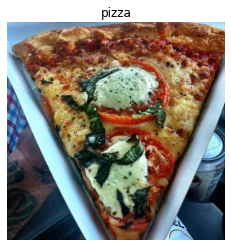

In [39]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode='binary',
                                               shuffle=True,
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [41]:
#Build a CNN model

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(224,224,3)),                       
      tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'), 
      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
      tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),                       
      tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'), 
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1,activation='sigmoid') 
])

In [42]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [43]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch = len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 29s 595ms/step - loss: 0.6963 - accuracy: 0.5664 - val_loss: 0.4462 - val_accuracy: 0.8020
Epoch 2/10
47/47 [==============================] - 28s 591ms/step - loss: 0.5166 - accuracy: 0.7450 - val_loss: 0.4438 - val_accuracy: 0.7880
Epoch 3/10
47/47 [==============================] - 28s 594ms/step - loss: 0.5245 - accuracy: 0.7462 - val_loss: 0.3962 - val_accuracy: 0.8080
Epoch 4/10
47/47 [==============================] - 28s 590ms/step - loss: 0.4637 - accuracy: 0.7796 - val_loss: 0.3935 - val_accuracy: 0.8440
Epoch 5/10
47/47 [==============================] - 28s 593ms/step - loss: 0.4788 - accuracy: 0.7851 - val_loss: 0.3347 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 28s 592ms/step - loss: 0.4376 - accuracy: 0.7984 - val_loss: 0.3485 - val_accuracy: 0.8700
Epoch 7/10
47/47 [==============================] - 28s 590ms/step - loss: 0.4683 - accuracy: 0.7821 - val_loss: 0.3104 - val_accuracy: 0.8680

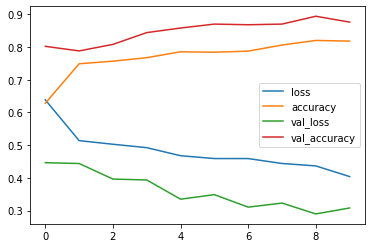

In [44]:
pd.DataFrame(history.history).plot()

In [78]:
!wget "http://4.bp.blogspot.com/-n-jZjyEzncE/Uq8IxN6-giI/AAAAAAAADWk/OL-YhSPEG_4/s1600/Pizza+Food+Hd+Wallpaper.jpg"

--2021-05-18 14:20:26--  http://4.bp.blogspot.com/-n-jZjyEzncE/Uq8IxN6-giI/AAAAAAAADWk/OL-YhSPEG_4/s1600/Pizza+Food+Hd+Wallpaper.jpg
Resolving 4.bp.blogspot.com (4.bp.blogspot.com)... 172.253.114.132, 2607:f8b0:4001:c22::84
Connecting to 4.bp.blogspot.com (4.bp.blogspot.com)|172.253.114.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272685 (266K) [image/jpeg]
Saving to: ‘Pizza+Food+Hd+Wallpaper.jpg’

Pizza+Food+Hd+Wallp 100%[===================>] 266.29K  --.-KB/s    in 0.001s  

2021-05-18 14:20:26 (282 MB/s) - ‘Pizza+Food+Hd+Wallpaper.jpg’ saved [272685/272685]



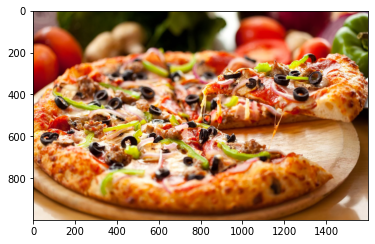

In [79]:
sampleimg = mpimg.imread("/content/Pizza+Food+Hd+Wallpaper.jpg")
plt.imshow(sampleimg)


In [80]:
sampleimg = tf.expand_dims(sampleimg,axis=0)
sampleimg = tf.cast(sampleimg,dtype=tf.float32)/255.
sampleimg = tf.image.resize(sampleimg,size=[224,224])

In [81]:
sampleimg.shape

TensorShape([1, 224, 224, 3])

In [82]:
model.predict(sampleimg)

array([[0.13817446]], dtype=float32)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0